# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np



%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_asset_data = {
    "QTY": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto_asset = pd.DataFrame(crypto_asset_data, index=tickers)

# Display shares data
df_crypto_asset

,QTY
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
eth_response_data = requests.get(eth_url)

#storing requests content in variables
btc_response_content = btc_response_data.content
btc_data = btc_response_data.json()

eth_response_content = eth_response_data.content
eth_data = eth_response_data.json()

# Using json.dumps with argument indent=4 to format and view fetched data
print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18892556,
            "total_supply": 18892556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48958.0,
                    "volume_24h": 31911473416,
                    "market_cap": 924779748100,
                    "percentage_change_1h": -0.325765594443383,
                    "percentage_change_24h": -0.387590124960734,
                    "percentage_change_7d": -14.4660215859535,
                    "percent_change_1h": -0.325765594443383,
                    "percent_change_24h": -0.387590124960734,
                    "percent_change_7d": -14.4660215859535
                },
                "CAD": {
                    "price": 62793.5308,
                    "volume_24h": 40929655803.3616,
               

In [6]:
#df_crypto_price = pd.DataFrame()
#df_crypto_price ["BTC"] = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
#df_crypto_price ["ETH"] = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
#df_crypto_price.index = df_crypto_price.index.date
#df_crypto_price.head()

In [16]:
crypto_asset_data = {
    "QTY": [1.2, 5.3],
    "Price": [btc_data["data"]["1"]["quotes"]["CAD"]["price"], eth_data["data"]["1027"]["quotes"]["CAD"]["price"] ]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto_asset = pd.DataFrame(crypto_asset_data, index=tickers)

# Display shares data
df_crypto_asset

,QTY,Price
BTC,1.2,62793.530800
ETH,5.3,5333.474058


In [17]:
df_crypto_asset.loc["ETH"]["Price"]

5333.474058

In [18]:
# Compute current value of my crpto
my_btc = float(df_crypto_asset.loc["BTC"]["QTY"])
my_btc_value = float(df_crypto_asset.loc["BTC"]["Price"] * my_btc)

my_eth = float(df_crypto_asset.loc["ETH"]["QTY"])
my_eth_value = float(df_crypto_asset.loc["ETH"]["Price"] * my_eth)

In [19]:
#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $75,352.24
The current value of your 5.3 ETH is $28,267.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
#my_agg = 200
#my_spy = 50

shares_data = {
    "QTY": [201, 51]
}   

# Set the tickers
share_tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_share_data = pd.DataFrame(shares_data, index=share_tickers)

df_share_data

,QTY
AGG,201
SPY,51


In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Create the Alpaca API object
# YOUR CODE HERE!

In [22]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit = 1000
).df

# Preview DataFrame
df_ticker.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-12-02 00:00:00-05:00  114.67  114.79  114.4001  114.61  7507924  450.72   

                                                              
                             high     low   close     volume  
time                                                          
2021-12-02 00:00:00-05:00  459.07  450.31  457.38  109873511

In [23]:
# Pick AGG and SPY close prices
df_share_prices = pd.DataFrame()
df_share_prices["AGG"] = df_ticker["AGG"]["close"]
df_share_prices["SPY"] = df_ticker["SPY"]["close"]
df_share_prices.index = df_share_prices.index.date
df_share_prices.head()



,AGG,SPY
2021-12-02,114.61,457.38


In [24]:
# Print AGG and SPY close prices
agg_close_price = float(df_share_prices["AGG"])
spy_close_price = float(df_share_prices["SPY"])

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $457.38


In [25]:
# Compute the current value of shares
my_spy = float(df_share_data.loc["SPY"])
my_spy_value = float(df_share_prices["SPY"] * my_spy)

my_agg = float(df_share_data.loc["AGG"])
my_agg_value = float(df_share_prices["AGG"] * my_agg)

In [26]:

#my_agg = float(df_share_qty.loc["AGG"])
#my_agg_value = round(float(df_share_prices["AGG"] * my_agg                          

#my_spy_value = spy_close_price * my_spy
#my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 51.0 SPY shares is $23,326.38
The current value of your 201.0 AGG shares is $23,036.61


### Savings Health Analysis

In [27]:
# Set monthly household income
monthly_income = 12000

In [28]:
# Consolidate financial assets data
df_savings = pd.DataFrame(columns = ["Amount"], index = ["Crypto", "Shares"])
df_savings.loc["Crypto"] = round(my_btc_value + my_eth_value,2)
df_savings.loc["Shares"] = round(my_agg_value + my_spy_value,2)

df_savings.head()

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
#display(df_savings)

,Amount
Crypto,103619.65
Shares,46362.99


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

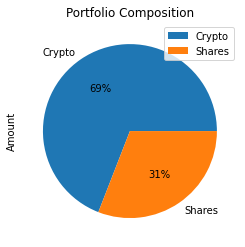

In [29]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition", autopct='%1.0f%%')

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency fund should be ${emergency_fund:,.2f}")

Emergency fund should be $36,000.00


In [31]:
# Calculate total mount of savings
total_savings = float(df_savings.loc["Crypto"] + df_savings.loc["Shares"])
print(f"Total Savings from Assets is ${total_savings:,.2f}")

Total Savings from Assets is $149,982.64


In [32]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough funds as Emergency Savings")
elif total_savings == emergency_fund:
        print(f"Congratulations! You have achieved your Emergency Savings Goal")
elif total_savings < emergency_fund:
        print(f"You need to save ${total_savings - emergency_fund:,.2f} to achieve the Emergency Savings Goal")
        

Congratulations! You have enough funds as Emergency Savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the ticker information
ticker = ["AGG","SPY"]

# Get approximately 4 year's worth of historical price data
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head(-1)

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0  240.62  240.67   
...            ...       ...       ...      ...        ...     ...     ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0  412.87  418.25   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0  417.44  418.22   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0  417.91  418.14   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0  417.81  419.01   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0  420.33  420.72   

                                           
                 low    close      volume  
2017-05-10       NaN      NaN         NaN  
2017-05-11  238.1300  239.410  45435690.0  
2017-05-12  238.6700  239.030  35283567.0  
2017-05-15  239.4500  240.245  42230620.0  
2017-05-16  239.6300  240.100  37206183.0  
...              ...      ...         ...  
2021-04-23  412.7900  416.720  62186191.0  
2021-04-26  416.8111  417.640  44689009.0  
2021-04-27  416.3000  417.480  45962264.0  
2021-04-28  416.9000  417.350  45533863.0  
2021-04-29  416.4400  419.990  70607144.0  

[1000 rows x 10 columns]

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
stock_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
stock_30year.portfolio_data.head(-1)

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0     0.001010   
...            ...       ...       ...      ...        ...          ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0    -0.000174   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0    -0.000871   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0    -0.002442   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0     0.000612   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0    -0.000612   

               SPY                                                      
              open    high       low    close      volume daily_return  
2017-05-10     NaN     NaN       NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.1300  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.6700  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.4500  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.6300  240.100  37206183.0    -0.000604  
...            ...     ...       ...      ...         ...          ...  
2021-04-23  412.87  418.25  412.7900  416.720  62186191.0     0.010720  
2021-04-26  417.44  418.22  416.8111  417.640  44689009.0     0.002208  
2021-04-27  417.91  418.14  416.3000  417.480  45962264.0    -0.000383  
2021-04-28  417.81  419.01  416.9000  417.350  45533863.0    -0.000311  
2021-04-29  420.33  420.72  416.4400  419.990  70607144.0     0.006326  

[1000 rows x 12 columns]

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
np.random.seed(0)

stock_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005943,0.989880,1.001611,0.996140,1.000584,0.999075,0.997513,0.987628,1.019525,1.007966,...,1.002026,1.004673,1.005384,1.002081,1.003545,1.016637,1.005762,0.988108,1.003739,1.005523
2,1.019196,0.984259,0.995080,0.999462,1.007677,0.995199,0.998330,0.983090,1.012859,1.004561,...,1.003517,1.011218,1.013054,1.008126,0.992200,1.016371,1.005471,0.990182,1.007516,1.009802
3,1.017185,0.994041,0.994339,1.004325,1.004851,0.994365,1.005287,0.976057,1.013008,0.999395,...,0.993337,1.015575,1.012952,1.008749,0.976987,1.024393,1.026645,0.999111,1.020815,1.007283
4,1.017706,0.991405,1.013926,1.011108,0.998584,0.987601,0.995616,0.980892,1.018723,0.988882,...,0.986357,1.020234,1.022164,1.030554,0.981729,1.020299,1.031860,1.004023,1.030620,1.009279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.932736,9.271534,42.724792,13.047104,16.600581,92.757818,97.279751,41.396645,123.631203,24.024887,...,9.631986,16.173758,8.263312,25.179277,13.903840,19.105675,11.915351,24.325068,2.574924,16.033307
7557,9.965589,9.490928,42.784248,13.099643,16.694750,93.341507,97.327835,41.845465,123.485301,24.028993,...,9.617267,16.017429,8.361907,25.027303,13.933922,18.721254,11.882991,24.497974,2.588047,16.134046
7558,9.949353,9.472314,42.681591,13.133986,16.667237,92.171051,98.743357,42.191736,124.078057,23.874418,...,9.600948,16.057146,8.392195,24.932693,13.765527,18.918171,11.999847,24.443944,2.592339,16.096381
7559,9.953878,9.400904,42.162140,13.196581,16.659180,91.638284,99.208319,42.188987,123.372764,24.200361,...,9.549972,16.027607,8.346104,24.678950,13.742595,18.880372,11.982995,24.264155,2.561407,16.280624


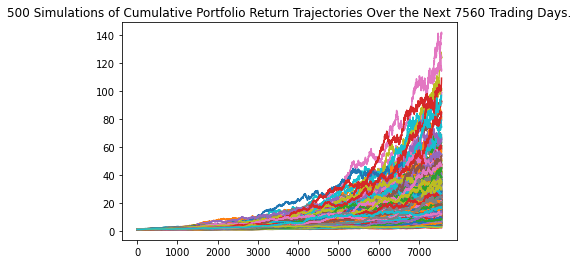

In [37]:
# Plot simulation outcomes
line_plot_eq30 = stock_30year.plot_simulation()

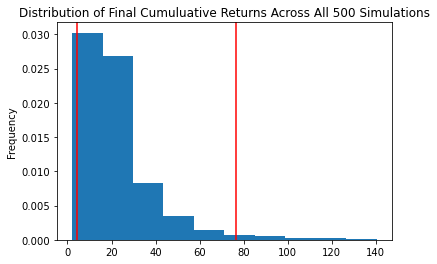

In [38]:
# Plot probability distribution and confidence intervals
dist_plot_eq30 = stock_30year.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary30 = stock_30year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary30)

count           500.000000
mean             22.795781
std              18.230830
min               2.126700
25%              12.032059
50%              18.059549
75%              27.069556
max             140.430826
95% CI Lower      4.454509
95% CI Upper     76.764797
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower1 = stock_summary30[8]*initial_investment
ci_upper1 = stock_summary30[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1:,.2f} and ${ci_upper1:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $89,090.18 and $1,535,295.93


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
higher_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = stock_summary30[8]*higher_initial_investment
ci_upper2 = stock_summary30[9]*higher_initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${higher_initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2:,.2f} and ${ci_upper2:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $133,635.26 and $2,302,943.90


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
stock_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
stock_5year.portfolio_data.head(-1)

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0     0.001010   
...            ...       ...       ...      ...        ...          ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0    -0.000174   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0    -0.000871   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0    -0.002442   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0     0.000612   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0    -0.000612   

               SPY                                                      
              open    high       low    close      volume daily_return  
2017-05-10     NaN     NaN       NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.1300  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.6700  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.4500  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.6300  240.100  37206183.0    -0.000604  
...            ...     ...       ...      ...         ...          ...  
2021-04-23  412.87  418.25  412.7900  416.720  62186191.0     0.010720  
2021-04-26  417.44  418.22  416.8111  417.640  44689009.0     0.002208  
2021-04-27  417.91  418.14  416.3000  417.480  45962264.0    -0.000383  
2021-04-28  417.81  419.01  416.9000  417.350  45533863.0    -0.000311  
2021-04-29  420.33  420.72  416.4400  419.990  70607144.0     0.006326  

[1000 rows x 12 columns]

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
np.random.seed(0)

stock_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003034,1.008268,1.002655,1.000133,1.001095,0.981477,1.004849,0.999747,0.994358,0.988347,...,1.003691,0.995088,0.975956,0.983642,0.999931,0.992341,0.992834,1.004878,0.991612,1.020460
2,0.989044,1.029275,0.985345,0.995190,0.979285,0.979752,0.996338,0.982341,0.985487,0.980866,...,1.002637,1.013465,0.972024,0.981887,0.980036,0.979579,0.988431,1.005633,1.005341,1.027365
3,0.986558,1.016424,0.977480,0.980906,0.962625,0.955760,0.988915,0.976911,0.977580,0.975866,...,1.019076,1.023450,0.985674,0.982647,0.984458,0.985250,0.996103,1.006580,0.990186,1.020214
4,1.009413,1.017347,0.984867,0.993408,0.965374,0.973458,0.998687,0.960714,0.990124,0.970085,...,1.033824,1.042226,0.998052,0.991329,0.994542,0.989636,1.014748,1.007601,0.988988,1.044615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.352271,2.048469,1.294553,1.301857,0.884087,3.827557,1.857702,2.814852,2.327733,1.248467,...,1.423557,1.629058,1.943281,1.658434,1.913021,1.550526,1.523159,2.462825,4.014298,2.126893
1257,1.337435,2.048714,1.298547,1.301787,0.880682,3.843077,1.839437,2.867790,2.335821,1.264370,...,1.409601,1.626852,1.949313,1.662597,1.907908,1.556563,1.560146,2.408005,4.036522,2.124072
1258,1.351576,2.044591,1.282068,1.320198,0.885402,3.842755,1.872515,2.854047,2.387547,1.244566,...,1.405782,1.639049,1.907365,1.661970,1.930704,1.551622,1.559275,2.392063,4.063164,2.123380
1259,1.344344,2.075008,1.275873,1.321008,0.888443,3.855310,1.862567,2.876916,2.396762,1.258039,...,1.374474,1.642981,1.912128,1.678574,1.923987,1.529267,1.578120,2.389626,4.096139,2.101597


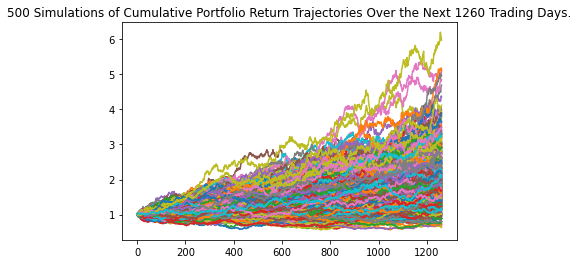

In [44]:
# Plot simulation outcomes
line_plot_eq5 = stock_5year.plot_simulation()

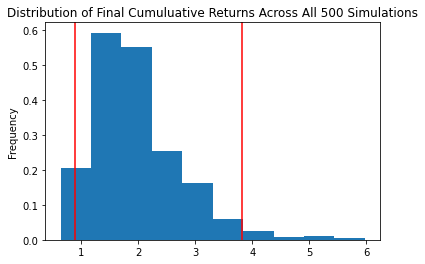

In [45]:
# Plot probability distribution and confidence intervals
dist_plot_eq5 = stock_5year.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary5 = stock_5year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary5)

count           500.000000
mean              1.972635
std               0.771153
min               0.633054
25%               1.462771
50%               1.816893
75%               2.338014
max               5.974254
95% CI Lower      0.893524
95% CI Upper      3.820153
Name: 1260, dtype: float64


In [47]:
# Set initial investment
initial_5_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = stock_summary5[8]*initial_5_investment
ci_upper_five = stock_summary5[9]*initial_5_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_5_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 5 years will end within in the range of $17,870.48 and $76,403.06


### Ten Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
stock_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Printing the simulation input data
stock_10year.portfolio_data.head(-1)

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0     0.001010   
...            ...       ...       ...      ...        ...          ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0    -0.000174   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0    -0.000871   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0    -0.002442   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0     0.000612   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0    -0.000612   

               SPY                                                      
              open    high       low    close      volume daily_return  
2017-05-10     NaN     NaN       NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.1300  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.6700  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.4500  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.6300  240.100  37206183.0    -0.000604  
...            ...     ...       ...      ...         ...          ...  
2021-04-23  412.87  418.25  412.7900  416.720  62186191.0     0.010720  
2021-04-26  417.44  418.22  416.8111  417.640  44689009.0     0.002208  
2021-04-27  417.91  418.14  416.3000  417.480  45962264.0    -0.000383  
2021-04-28  417.81  419.01  416.9000  417.350  45533863.0    -0.000311  
2021-04-29  420.33  420.72  416.4400  419.990  70607144.0     0.006326  

[1000 rows x 12 columns]

In [49]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
np.random.seed(0)

stock_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002726,1.004349,0.996431,1.021984,0.988095,1.017069,1.007048,0.999821,0.983951,1.017773,...,0.996608,0.986422,0.996414,1.008280,0.988150,0.985394,0.987265,1.009684,0.969318,0.999868
2,1.008817,1.021750,0.985042,1.033065,0.981079,1.030711,0.999727,0.989729,0.976682,1.025197,...,0.982558,0.992973,0.983697,1.014230,0.975260,0.991499,0.989157,1.010808,0.960442,0.990345
3,1.024030,1.017733,0.990129,1.042844,0.993971,1.031195,1.009424,0.987066,0.977473,1.042117,...,0.979637,1.016065,0.988572,1.014136,0.982285,0.992358,0.994687,1.013604,0.960953,0.999588
4,1.028377,1.013672,0.966909,1.036019,0.992962,1.025474,1.004028,1.013799,0.989917,1.037905,...,0.981303,1.016069,1.001697,1.000181,0.967878,1.005551,0.999312,1.000825,0.961331,0.999468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.424323,1.564221,6.553771,4.427146,2.020078,1.611248,2.198261,4.936815,7.398154,1.727540,...,1.824702,6.148988,2.293816,1.265090,6.606295,2.196294,2.978592,3.487937,1.878011,3.578392
2517,2.421381,1.563957,6.579518,4.508201,2.046394,1.661811,2.197592,4.990825,7.398390,1.740310,...,1.777594,6.169107,2.248487,1.261620,6.551303,2.203558,2.965858,3.403184,1.887374,3.627497
2518,2.416846,1.583864,6.582018,4.495276,2.015642,1.649639,2.199173,4.903400,7.375000,1.768785,...,1.765441,6.186803,2.251643,1.267396,6.486571,2.210685,2.886162,3.413091,1.891979,3.687903
2519,2.453620,1.585320,6.593373,4.529189,2.037962,1.633317,2.210997,4.970683,7.250231,1.759784,...,1.769930,6.108162,2.286763,1.257169,6.512195,2.267011,2.863922,3.438665,1.907138,3.715930


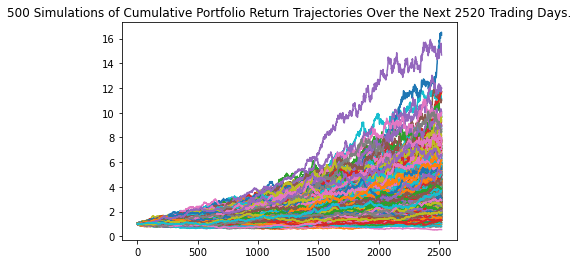

In [50]:
# Plot simulation outcomes
line_plot_eq10 = stock_10year.plot_simulation()

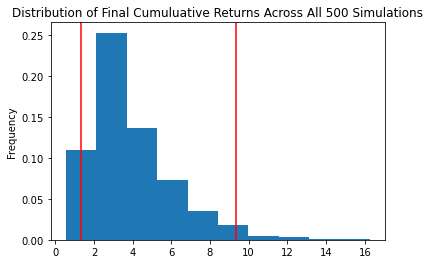

In [51]:
# Plot probability distribution and confidence intervals
dist_plot_eq10 = stock_10year.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary10 = stock_10year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary10)

count           500.000000
mean              3.948535
std               2.178240
min               0.543001
25%               2.444111
50%               3.449482
75%               5.013261
max              16.278846
95% CI Lower      1.311099
95% CI Upper      9.346102
Name: 2520, dtype: float64


In [53]:
# Set initial investment
# YOUR CODE HERE!
initial_10_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = stock_summary10[8]*initial_10_investment
ci_upper_ten = stock_summary10[9]*initial_10_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_10_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 10 years will end within in the range of $26,221.99 and $186,922.05
